In [58]:
import pandas as pd
import seaborn as sns
import re
from gensim.models import Word2Vec
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [46]:
recipe_df = pd.read_csv("/Users/serenaliu/Documents/GitHub/FoodReceipeNLP/data/all_recipes.csv")
recipe_df.head()

,Name,Ingredients,Cuisine
0,Fish Tacos - Baja Style,"all-purpose flour,baking powder,beer,cayenne,c...",mexican
1,Margarita,"lemon juice,lime juice,tequila,triple sec",mexican
2,Menudo Rojo (Red Menudo),"chili peppers,corn tortillas,crushed red peppe...",mexican
3,Birria,"bay leaves,beef,black peppercorns,cider vinega...",mexican
4,Machaca Burritos,"butter,eggs,grape tomatoes,meat,mozzarella che...",mexican


In [20]:
# No missing values found
recipe_df.isnull().any()

Name           False
Ingredients    False
Cuisine        False
dtype: bool

## Data Exploration

<AxesSubplot:title={'center':'Histogram of the Number of Ingredients Across All Recipes'}, xlabel='Ingredients', ylabel='Count'>

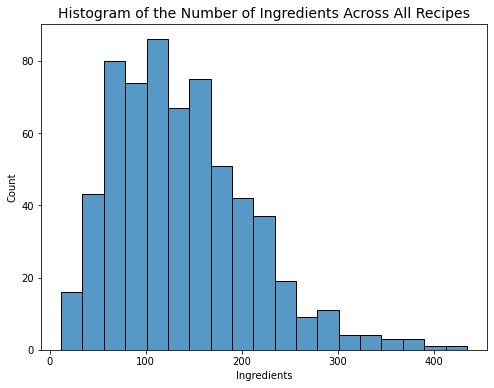

In [10]:
# Reference: https://www.kaggle.com/code/fritzpassow/recipe-ingredients-analysis
num_ingredients = recipe_df.Ingredients.map(lambda x:len(x))

plt.figure(figsize = (8,6))
plt.title("Histogram of the Number of Ingredients Across All Recipes", fontsize = 14)
sns.histplot(num_ingredients)

<AxesSubplot:title={'center':'Number of Recipe for Each Cuisine'}, xlabel='Cuisine'>

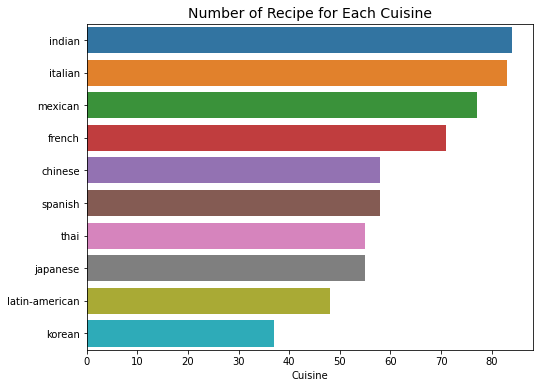

In [66]:
cusine_counts = recipe_df.Cuisine.value_counts()
plt.figure(figsize = (8,6))
plt.title("Number of Recipe for Each Cuisine", fontsize = 14)
sns.barplot(x = cusine_counts, y = cusine_counts.index)

## Data cleaning

In [44]:
# Reference: https://builtin.com/machine-learning/nlp-word2vec-python
def clean_text(df, col_name):
    '''
    Given a column of data, remove unwanted special characters from the text
    '''
    clean_txt = []
    for w in range(len(df[col_name])):
        desc = df[col_name][w].lower()

        # remove punctuation
        desc = re.sub('[^a-zA-Z]', ' ', desc)

        #remove tags
        desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)

        # remove digits and special chars
        desc=re.sub("(\\d|\\W)+"," ",desc)
        clean_txt.append(desc)

    df['Cleaned_'+ col_name] = clean_txt
    return df

In [47]:
recipe_df = clean_text(recipe_df, 'Name')
recipe_df.head()

,Name,Ingredients,Cuisine,Cleaned_Name
0,Fish Tacos - Baja Style,"all-purpose flour,baking powder,beer,cayenne,c...",mexican,fish tacos baja style
1,Margarita,"lemon juice,lime juice,tequila,triple sec",mexican,margarita
2,Menudo Rojo (Red Menudo),"chili peppers,corn tortillas,crushed red peppe...",mexican,menudo rojo red menudo
3,Birria,"bay leaves,beef,black peppercorns,cider vinega...",mexican,birria
4,Machaca Burritos,"butter,eggs,grape tomatoes,meat,mozzarella che...",mexican,machaca burritos


In [53]:
corpus = []
for col in recipe_df['Cleaned_Name']:
    word_list = col.split(' ')
    corpus.append(word_list)
corpus

[['fish', 'tacos', 'baja', 'style'],
 ['margarita'],
 ['menudo', 'rojo', 'red', 'menudo', ''],
 ['birria'],
 ['machaca', 'burritos'],
 ['chilaquiles', 'with', 'chicken'],
 ['nopal', 'breakfast'],
 ['watermelon', 'agua', 'fresca'],
 ['enfrijoladas'],
 ['morisqueta', 'con', 'chorizo'],
 ['memelas'],
 ['pork', 'carnitas'],
 ['mexican',
  'style',
  'meat',
  'and',
  'vegetable',
  'stew',
  'azteca',
  's',
  'molcajete'],
 ['el', 'rey', 's', 'fish', 'tacos'],
 ['capirotada'],
 ['mole', 'coloradito', 'enchiladas', 'from', 'rick', 'bayless'],
 ['cuernitos', 'menonitas', 'mennonite', 'little', 'horns', ''],
 ['cabrito', 'goat', 'and', 'red', 'gravy'],
 ['guava', 'cheese', 'flan'],
 ['michelada', 'authentic'],
 ['chicken', 'pozole'],
 ['aguachiles'],
 ['churros', 'from', 'casa', 'marcela'],
 ['mexican', 'elote'],
 ['nopalitos', 'con', 'huevos', 'breakfast', 'tacos'],
 ['best', 'albondigas', 'soup'],
 ['horchata'],
 ['restaurant', 'guacamole'],
 ['sopa', 'de', 'lima', 'merida', 'yucatan', ''

In [62]:
model = Word2Vec(corpus, min_count = 1, vector_size = 5, window = 5, sg = 1)

In [64]:
model.wv['fish', 'tacos', 'baja', 'style']

array([[-0.00817792, -0.00396266,  0.13299486, -0.03971865,  0.00161077],
       [ 0.02428802,  0.01653264,  0.13356458, -0.19464216,  0.0211989 ],
       [ 0.17265771, -0.00138324, -0.01204048,  0.02726471,  0.00117524],
       [ 0.1318949 ,  0.18326283,  0.05470707, -0.26369676,  0.13187808]],
      dtype=float32)

In [65]:
for name in corpus:
    